<a href="https://colab.research.google.com/github/Rafae1040/metricas_avaliacao/blob/main/Projeto_Metricas_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Gerar um conjunto de dados sintético
X, y = make_classification(n_samples=200, n_features=7, random_state=42)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Calcular matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
vp, fn, fp, vn = matriz_confusao.ravel()

# Calcular métricas
acuracia = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
especificidade = vn / (vn + fp) if (vn + fp) != 0 else 0


In [ ]:
# Criar um DataFrame com as métricas
df_metricas = pd.DataFrame({
    "Métrica": ["Acurácia", "Sensibilidade (Recall)", "Especificidade", "Precisão", "F-score"],
    "Valor": [acuracia, recall, especificidade, precisao, f_score]
})

# Exibir resultados
df_metricas.set_index("Métrica", inplace=True)
print("Cálculo de Métricas de Avaliação de Aprendizado\n")
print("Utilizando um modelo de Machine Learning para calcular as métricas de avaliação.\n")
print("Tabela 1: Visão geral das métricas usadas para avaliar métodos de classificação.")
print("VP: Verdadeiros Positivos; FN: Falsos Negativos; FP: Falsos Positivos; VN: Verdadeiros Negativos; P: Precisão; S: Sensibilidade; N: Total de Elementos.\n")
print(df_metricas)

Cálculo de Métricas de Avaliação de Aprendizado

Utilizando um modelo de Machine Learning para calcular as métricas de avaliação.

Tabela 1: Visão geral das métricas usadas para avaliar métodos de classificação.
VP: Verdadeiros Positivos; FN: Falsos Negativos; FP: Falsos Positivos; VN: Verdadeiros Negativos; P: Precisão; S: Sensibilidade; N: Total de Elementos.

                           Valor
Métrica                         
Acurácia                0.825000
Sensibilidade (Recall)  0.750000
Especificidade          0.750000
Precisão                0.947368
F-score                 0.837209


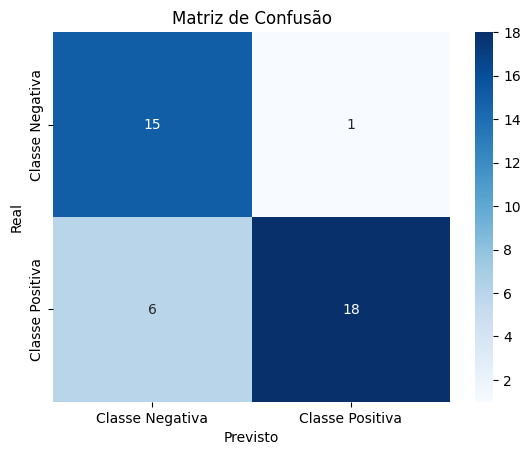

In [ ]:
# Visualizar a matriz de confusão
tick_labels = ["Classe Negativa", "Classe Positiva"]
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=tick_labels, yticklabels=tick_labels)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

<ipython-input-17-9a258a4049f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metricas.index, y=df_metricas["Valor"], palette="viridis")


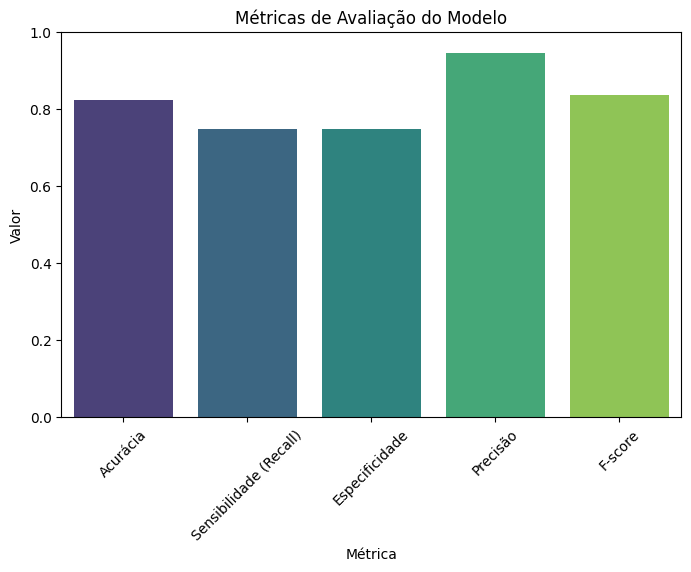

In [ ]:
# Gráfico de barras para as métricas
plt.figure(figsize=(8, 5))
sns.barplot(x=df_metricas.index, y=df_metricas["Valor"], palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.title("Métricas de Avaliação do Modelo")
plt.xticks(rotation=45)
plt.show()
